# Scraping Top MBA Colleges in bangalore using Python

#### Web scraping is an automatic method to obtain large amounts of data from websites.

### list of creative fields on website:
1)grade

2)rank

3)MBA_college 

4)city

5)program

6)exam

7)fees

8)compare

## Outline of the project:
1)Understanding the structure of Website.

2)Installing and Importing required libraries.

3)Extracting the details of different fields from website using BeautifulSoup.

4)Storing the extracted data into a dictionary.

5)Compiling all the data into a DataFrame using Pandas and saving the data into CSV file.

In [1]:
import requests

In [2]:
topic_url='https://www.mbauniverse.com/top-mba-colleges/bangalore#:~:text=Top%20MBA%20Colleges%20In%20bangalore%20%20%20,NMAT...%20read%20more%20%208%20more%20rows%20'

### To download the web page we are using the requests.get function

In [3]:
response=requests.get(topic_url)

In [4]:
type(response)

requests.models.Response

### If the request was successful the value of the response code will be between 200 to 299

In [5]:
response.status_code

200

In [6]:
page_content=response.text

In [7]:
len(page_content)

251511

### The page contains over 2,51,511 characters! so that we will just view first 500 characters from the webpage.

In [8]:
page_content[:500]

'<!DOCTYPE html>\n<html lang="en" dir="ltr"\n\n  xmlns:content="http://purl.org/rss/1.0/modules/content/"\n  xmlns:dc="http://purl.org/dc/terms/"\n  xmlns:foaf="http://xmlns.com/foaf/0.1/"\n  xmlns:og="http://ogp.me/ns#"\n  xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"\n  xmlns:sioc="http://rdfs.org/sioc/ns#"\n  xmlns:sioct="http://rdfs.org/sioc/types#"\n  xmlns:skos="http://www.w3.org/2004/02/skos/core#"\n  xmlns:xsd="http://www.w3.org/2001/XMLSchema#">\n\n<head>\n  <!-- Google tag (gtag.js) -->\n<script '

### Creating a file and Writing page contents into it

In [9]:
with open('Top_MBA-college.html', 'w', encoding='utf-8') as f:
    f.write(page_content)

In [10]:
# Install the library
!pip install beautifulsoup4 --upgrade --quiet

### Use Beautiful Soup to parse and extract information

In [11]:
from bs4 import BeautifulSoup

In [12]:
with open('Top_MBA-college.html', 'r') as f:
    html_source = f.read()

In [13]:
html_source[:1000]

'<!DOCTYPE html>\n<html lang="en" dir="ltr"\n\n  xmlns:content="http://purl.org/rss/1.0/modules/content/"\n  xmlns:dc="http://purl.org/dc/terms/"\n  xmlns:foaf="http://xmlns.com/foaf/0.1/"\n  xmlns:og="http://ogp.me/ns#"\n  xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"\n  xmlns:sioc="http://rdfs.org/sioc/ns#"\n  xmlns:sioct="http://rdfs.org/sioc/types#"\n  xmlns:skos="http://www.w3.org/2004/02/skos/core#"\n  xmlns:xsd="http://www.w3.org/2001/XMLSchema#">\n\n<head>\n  <!-- Google tag (gtag.js) -->\n<script async src="https://www.googletagmanager.com/gtag/js?id=G-BV0N37WRY2"></script>\n<script>\n  window.dataLayer = window.dataLayer || [];\n  function gtag(){dataLayer.push(arguments);}\n  gtag(\'js\', new Date());\n\n  gtag(\'config\', \'G-BV0N37WRY2\');\n</script>\n\n  <!-- Google Tag Manager -->\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\nj=d.createElement(s),dl=l!=\'dataLayer\'

### Parsing the HTML webpage with beautifulsoup to read the the content present in that page

In [14]:
doc = BeautifulSoup(html_source, 'html.parser')

In [15]:
type(doc)

bs4.BeautifulSoup

In [16]:
doc.title

<title>Top MBA Colleges In bangalore | MBAUniverse.com</title>

In [18]:
doc.title.text

'Top MBA Colleges In bangalore | MBAUniverse.com'

### Fetching the rows with find_all function in the webpage to get the data present in it.

In [19]:
rows = doc.tbody.find_all('tr')

In [20]:
rows[:5]

[<tr class="odd views-row-first">
 <td class="views-field views-field-field-college-field-grade">
             AAA+          </td>
 <td class="views-field views-field-views-conditional">
             1          </td>
 <td class="views-field views-field-field-college-title">
 <div class="ranking-college"><div class="title"><a href="/college/bangaloremba/indian-institute-of-management-iim-bangalore">IIM Bangalore: Indian Institute of Management</a></div><div class="description">Established in 1973 in Indiaâ€™s high technology capital, IIM Bangalore is one of the top three management... <a class="views-more-link" href="/college/bangaloremba/indian-institute-of-management-iim-bangalore">Read more</a></div></div> </td>
 <td class="views-field views-field-field-college-field-location">
             Bangalore          </td>
 <td class="views-field views-field-title">
 <a href="/college/bangaloremba/indian-institute-of-management-iim-bangalore/pgp">Post Graduate Programme in Management (PGP) L

### Creating dictionary to append data inside it

In [21]:
grade = []
rank = []
MBA_college = []
city = []
program = []
exam = []
fees = []
compare = []
table_dict = {'grade': grade,
              'Rank': rank,
              'MBA college': MBA_college,
              'city':city,
              'program':program,
              'exam': exam,
              'fees':fees,
              'compare':compare
              }

In [22]:
doc.tbody.find_all('td')

[<td class="views-field views-field-field-college-field-grade">
             AAA+          </td>,
 <td class="views-field views-field-views-conditional">
             1          </td>,
 <td class="views-field views-field-field-college-title">
 <div class="ranking-college"><div class="title"><a href="/college/bangaloremba/indian-institute-of-management-iim-bangalore">IIM Bangalore: Indian Institute of Management</a></div><div class="description">Established in 1973 in Indiaâ€™s high technology capital, IIM Bangalore is one of the top three management... <a class="views-more-link" href="/college/bangaloremba/indian-institute-of-management-iim-bangalore">Read more</a></div></div> </td>,
 <td class="views-field views-field-field-college-field-location">
             Bangalore          </td>,
 <td class="views-field views-field-title">
 <a href="/college/bangaloremba/indian-institute-of-management-iim-bangalore/pgp">Post Graduate Programme in Management (PGP) Leading to MBA Degree</a> </td>

In [23]:
rows[0].find_all('td')[2].text.strip()

'IIM Bangalore: Indian Institute of ManagementEstablished in 1973 in Indiaâ€™s high technology capital, IIM Bangalore is one of the top three management... Read more'

In [24]:
rows[0].find_all('td')[4].text.strip()

'Post Graduate Programme in Management (PGP) Leading to MBA Degree'

In [25]:
rows[3].find_all('td')[1].text.strip()

'42'

### Appending values from rows in dictionary's value

In [26]:
for row in rows:
    table_dict.setdefault('grade', []).append(row.find_all('td')[0].text.strip())
    table_dict.setdefault('Rank', []).append(row.find_all('td')[1].text.strip())
    table_dict.setdefault('MBA college', []).append(row.find_all('td')[2].text.strip())
    table_dict.setdefault('city', []).append(row.find_all('td')[3].text.strip())
    table_dict.setdefault('program', []).append(row.find_all('td')[4].text.strip())
    table_dict.setdefault('exam', []).append(row.find_all('td')[5].text.strip())
    table_dict.setdefault('fees', []).append(row.find_all('td')[6].text.strip())
    table_dict.setdefault('compare', []).append(row.find_all('td')[7].text.strip())

In [27]:
print(table_dict)

{'grade': ['AAA+', 'AAA', 'AA+', 'AA+', 'AA+', 'AA+', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'A+', 'A+', 'A+', 'A+', 'A+', 'A+', 'A+', 'A+', 'A+', 'A+', 'A+', 'A+', 'A+', 'A+', 'A+', 'A+', 'A+', 'A+', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'], 'Rank': ['1', 'NotRanked', '34', '42', '44', 'NotRanked', '63', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', '72', '83', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked', 'NotRanked'], 'MBA college': ['IIM Bangalore: Indian Institute of ManagementEstablished in 1973 in Indiaâ€™s high technology capital, IIM Bangalore is one of the top three management... Read more', 'JAGSOM Bangalore: Jagdish Sheth School of Management Bangalore\nJagdish Sheth School 

### Converting dictionary into a DataFrame

In [28]:
import pandas as pd
df=pd.DataFrame(table_dict)
df

,grade,Rank,MBA college,city,program,exam,fees,compare
0,AAA+,1,IIM Bangalore: Indian Institute of ManagementE...,Bangalore,Post Graduate Programme in Management (PGP) Le...,"CAT, GMAT","INR 23,20,000",Add to compare
1,AAA,NotRanked,JAGSOM Bangalore: Jagdish Sheth School of Mana...,Bangalore,Post Graduate Diploma in Management (PGDM),"CAT, XAT, MAT, CMAT, NMAT... read more","INR 14,90,000",Add to compare
2,AA+,34,SIBM Bangalore: Symbiosis Institute of Busines...,Bangalore,Master of Business Administration (MBA),SNAP,"INR 16,00,000",Add to compare
3,AA+,42,Indus Business Academy - IBA Bangalore\n\n\nEs...,Bangalore,Post Graduate Diploma in Management (PGDM),"CAT, XAT, MAT, CMAT, NMAT... read more","INR 9,45,000",Add to compare
4,AA+,44,XIME Bangalore: Xavier Institute of Management...,Bangalore,Post Graduate Diploma in Management (PGDM),"CAT, XAT, MAT, CMAT, ATMA... read more","INR 11,50,000",Add to compare
5,AA+,NotRanked,Christ University Bengaluru: Institute of Mana...,Bangalore,Master of Business Administration (MBA),"CAT, XAT, CMAT, MAT, ATMA... read more","INR 7,54,000",Add to compare
6,AA,63,St. Josephâ€™s Institute of Management: SJIM B...,Bangalore,Post Graduate Diploma in Management (PGDM),"CAT, XAT, MAT, CMAT, ATMA... read more","INR 8,80,000",Add to compare
7,AA,NotRanked,AIMS School of Business (AIMS Institutes)Estab...,Bangalore,Master of Business Administration (MBA),"CAT, XAT, MAT, CMAT, ATMA... read more","INR 9,06,000",Add to compare
8,AA,NotRanked,WE School Bangalore: Prin. L. N. Welingkar Ins...,Bangalore,Post Graduate Diploma in Management (PGDM),"CAT, XAT, CMAT, ATMA, ... read more","INR 13,00,000",Add to compare
9,AA,NotRanked,Alliance School of Business - Alliance Univers...,Bangalore,Master of Business Administration (MBA),"CAT, XAT, MAT, CMAT, NMAT... read more","INR 15,00,000",Add to compare


### Helper function for fetching page and parse with BeautifulSoup()

In [29]:
# Creating function fetching page and parse with BeautifulSoup()
def get_page(url):
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(url))
    page_content = response.text
    return BeautifulSoup(page_content,'html.parser')

### Helper function which will return dictionary

In [30]:
# Creating function which will return dictionary
def get_dict():
    grade = []
    rank = []
    MBA_college = []
    city = []
    program = []
    exam = []
    fees = []
    compare = []
    table_dict = {'grade': grade,'rank': rank,'MBA college': MBA_college,'city':city,'program':program,'exam': exam,
                 'fees':fees,'compare':compare}
    return table_dict

### Helper function for getting data from the rows and appending it into dictionary

In [31]:
# Creating function for getting data from the rows and appending it into dictionary
def get_rows(doc,table_dict):              
    rows = doc.tbody.find_all('tr')
    table_dict = table_dict
    for row in rows:
        table_dict['grade'].append(row.find_all('td')[0].text.strip())
        table_dict['rank'].append(row.find_all('td')[1].text.strip())
        table_dict['MBA college'].append(row.find_all('td')[2].text.strip())
        table_dict['city'].append(row.find_all('td')[3].text.strip())
        table_dict['program'].append(row.find_all('td')[4].text.strip())
        table_dict['exam'].append(row.find_all('td')[5].text.strip())
        table_dict['fees'].append(row.find_all('td')[6].text.strip())
        table_dict['compare'].append(row.find_all('td')[7].text.strip())
    return table_dict

### Helper function for converting Dictionary into DataFrame

In [32]:
def get_df(dictionary):
    df = pd.DataFrame(dictionary)
    return df

### Helper function for writing CSV file

In [33]:
def write_csv(dataframe,file_name):
    dataframe.to_csv(file_name,index=False)

### Master function which takes url and store data in CSV file

In [34]:
def get_players(url):
    doc = get_page(url)
    table_dict = get_dict()
    table_dict = get_rows(doc,table_dict)
    df = get_df(table_dict)
    file_name='top_MBA-college.csv'
    write_csv(df,file_name)
    return 'top_MBA-college written to file "{}"'.format(file_name )
    

In [35]:
get_players('https://www.mbauniverse.com/top-mba-colleges/bangalore')

'top_MBA-college written to file "top_MBA-college.csv"'

In [38]:
data=pd.read_csv('top_MBA-college.csv')
data

,grade,rank,MBA college,city,program,exam,fees,compare
0,AAA+,1,IIM Bangalore: Indian Institute of ManagementE...,Bangalore,Post Graduate Programme in Management (PGP) Le...,"CAT, GMAT","INR 23,20,000",Add to compare
1,AAA,NotRanked,JAGSOM Bangalore: Jagdish Sheth School of Mana...,Bangalore,Post Graduate Diploma in Management (PGDM),"CAT, XAT, MAT, CMAT, NMAT... read more","INR 14,90,000",Add to compare
2,AA+,34,SIBM Bangalore: Symbiosis Institute of Busines...,Bangalore,Master of Business Administration (MBA),SNAP,"INR 16,00,000",Add to compare
3,AA+,42,Indus Business Academy - IBA Bangalore\n\n\nEs...,Bangalore,Post Graduate Diploma in Management (PGDM),"CAT, XAT, MAT, CMAT, NMAT... read more","INR 9,45,000",Add to compare
4,AA+,44,XIME Bangalore: Xavier Institute of Management...,Bangalore,Post Graduate Diploma in Management (PGDM),"CAT, XAT, MAT, CMAT, ATMA... read more","INR 11,50,000",Add to compare
5,AA+,NotRanked,Christ University Bengaluru: Institute of Mana...,Bangalore,Master of Business Administration (MBA),"CAT, XAT, CMAT, MAT, ATMA... read more","INR 7,54,000",Add to compare
6,AA,63,St. Joseph’s Institute of Management: SJIM Ban...,Bangalore,Post Graduate Diploma in Management (PGDM),"CAT, XAT, MAT, CMAT, ATMA... read more","INR 8,80,000",Add to compare
7,AA,NotRanked,AIMS School of Business (AIMS Institutes)Estab...,Bangalore,Master of Business Administration (MBA),"CAT, XAT, MAT, CMAT, ATMA... read more","INR 9,06,000",Add to compare
8,AA,NotRanked,WE School Bangalore: Prin. L. N. Welingkar Ins...,Bangalore,Post Graduate Diploma in Management (PGDM),"CAT, XAT, CMAT, ATMA, ... read more","INR 13,00,000",Add to compare
9,AA,NotRanked,Alliance School of Business - Alliance Univers...,Bangalore,Master of Business Administration (MBA),"CAT, XAT, MAT, CMAT, NMAT... read more","INR 15,00,000",Add to compare


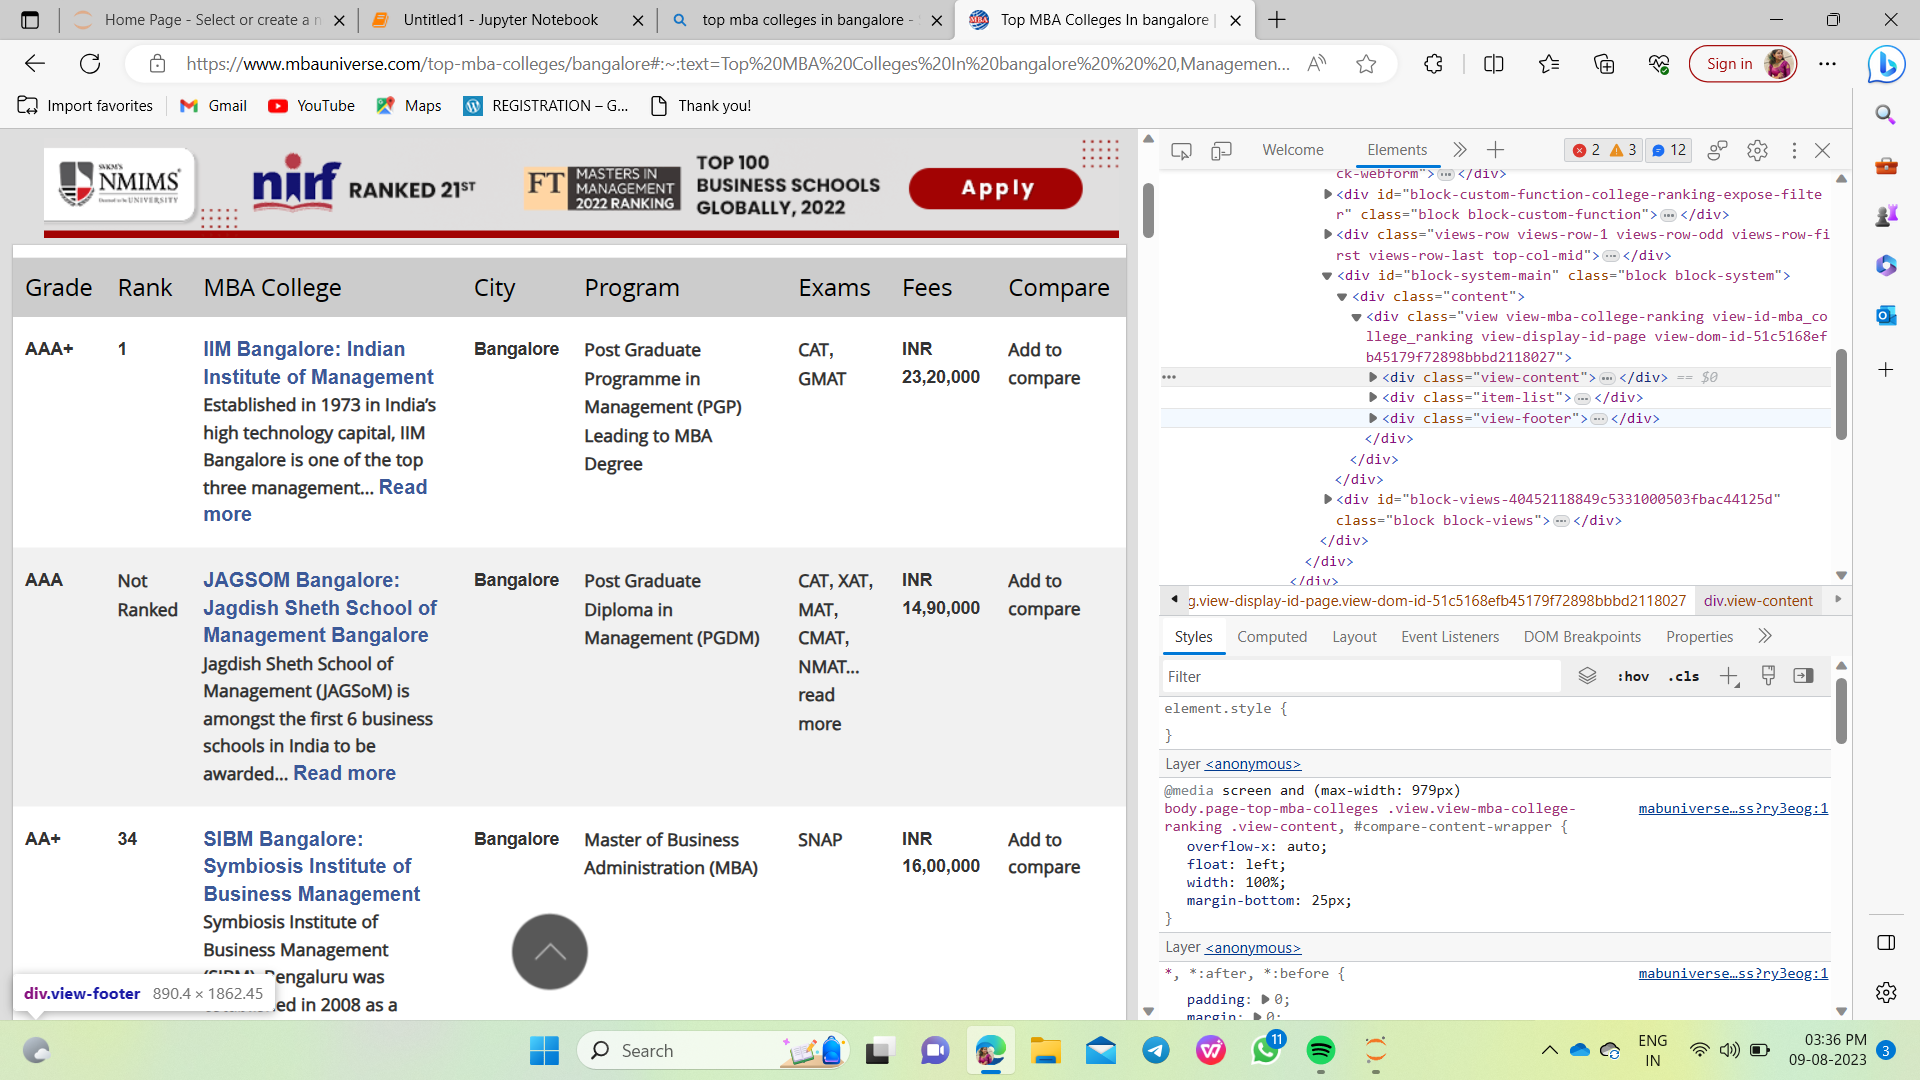

# Summary:
### 1) Python libraries like Requests and BeautifulSoup were utilized for web scraping purposes.
### 2)The aim was to extract details of the Top MBA colleges in bangalore, including information such as their Rank, grade, college, city,  program, exam, fees etc. 
### 3)After successfully scraping this data, it was organized and structured into a CSV file consisting of 39 rows and 9 columns. 
### 4)This CSV file serves as a comprehensive summary of the scraped information, enabling easy access and analysis of the top MBA colleges details.

## References
www.mbauniverse.com/top-mba-colleges/bangalore
